<a href="https://colab.research.google.com/github/amanda-coj/MD_Suicide_Rate/blob/main/MD_Suicide_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados de Taxas de Suicídio (1985-2016)**

Este notebook tem como objetivo baixar e analisar um conjunto de dados sobre taxas de suicídio entre **1985 e 2016**. Utilizaremos ferramentas como **Python, Pandas, Seaborn e Matplotlib** para explorar os dados e visualizar tendências ao longo do tempo.



*   O objetivo deste modelo é prever a taxa de suicídio.a
*   Após a Análise Exploratória de Dados, usaremos modelos de Regressão para esta previsão.

Este conjunto de dados compilado foi extraído de quatro outros conjuntos de dados vinculados por tempo e lugar, e foi construído para encontrar sinais correlacionados ao aumento das taxas de suicídio entre diferentes coortes globalmente, em todo o espectro socioeconômico.

# **Configuração da API do Kaggle para instalar o dataset**


**LEMBRETE**: É necessario fazer o download da API do kaggle para adicionar em **files.upload**

In [ ]:
from google.colab import files

In [ ]:
files.upload()



Saving kaggle.json to kaggle (3).json


{'kaggle (3).json': b'{"username":"amandacoj","key":"89af22b4406b8807f02c749975a286ca"}'}

In [ ]:
pip install kaggle q

In [ ]:
!mkdir ~p ~/.kaggle

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets list

401 - Unauthorized - Unauthenticated


In [ ]:
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016

Dataset URL: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016
License(s): world-bank
suicide-rates-overview-1985-to-2016.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip suicide-rates-overview-1985-to-2016.zip

Archive:  suicide-rates-overview-1985-to-2016.zip
replace master.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: master.csv              


In [ ]:
!pip install basemap
!pip install basemap-data-hires


#Importando Bibliotecas

##Bibliotecas Necessárias


In [ ]:
# Importação de Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Análise Exploratória de Dados**





In [1]:
df = pd.read_csv('suicide-rates-overview-1985-to-2016.zip')
df_original = df.copy() # Cria uma cópia do dataframe original para análise futura
df
display(df.head(20))

NameError: name 'pd' is not defined

In [ ]:
# Mostrar o tipo de dados de cada coluna
print(df.dtypes)

In [ ]:
# Verificação de valores nulos
df.isnull()

In [ ]:
# Descobrindo valores nulos
null_val = df.isnull()
for i in df.columns:
    print(i, end=", ")


In [ ]:
for col in df.columns:
    print('nulls in '+col+' :', len(null_val[null_val[col]==True]))


In [ ]:
df.head()

In [ ]:
df.replace(np.NaN,-99999.0,inplace=True)
df.head(10)

In [ ]:
# Normalização e Engenharia de Características
def categorical_to_numeric(df):
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = df[col].astype('category').cat.codes
    return df

df = categorical_to_numeric(df)

In [ ]:
#Detecção de Outlier
def detect_outliers(df, threshold=3, remove=False):

    df = df.copy()  # Evita modificar o DataFrame original
    numerical_cols = df.select_dtypes(include=np.number).columns
    z_scores = np.abs(df[numerical_cols].apply(zscore))
    df["outlier"] = (z_scores > threshold).any(axis=1)

    # Calcula a porcentagem de outliers
    outlier_percentage = (df["outlier"].sum() / len(df)) * 100
    print(f"Porcentagem de outliers: {outlier_percentage:.2f}%")

    # Remove outliers, se especificado
    if remove:
        df = df[~df["outlier"]].drop(columns=["outlier"])
    return df

In [ ]:
    # Selecionar apenas colunas numéricas
    numerical_cols = df.select_dtypes(include=np.number).columns
    correlation_matrix = df[numerical_cols].corr()

    # Criar o heatmap da matriz de correlação
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=False,
                cmap="coolwarm", linewidths=0.5)
    plt.title("Matriz de Correlação das Variáveis")
    plt.show()

# **Visualizações**


## **Visualizações Gerais**


<ipython-input-107-46889ca31509>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df["year"], y=df["suicides_no"], estimator="sum", ci=None)


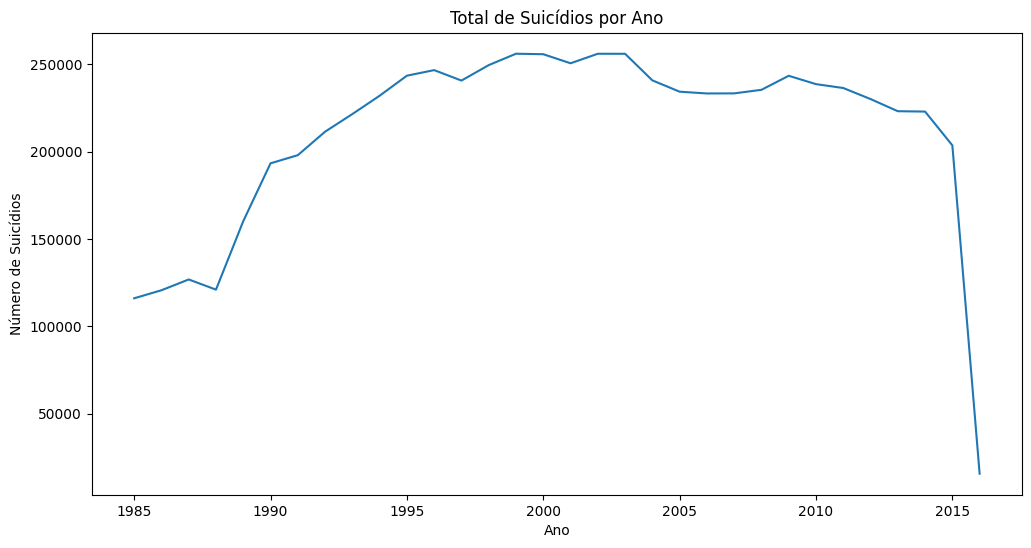

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df["year"], y=df["suicides_no"], estimator="sum", ci=None)
plt.title("Total de Suicídios por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Suicídios")
plt.show()


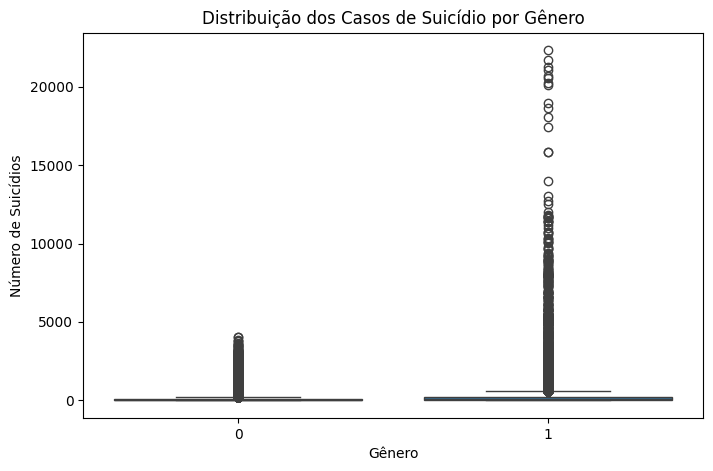

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["sex"], y=df["suicides_no"])
plt.title("Distribuição dos Casos de Suicídio por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Número de Suicídios")
plt.show()


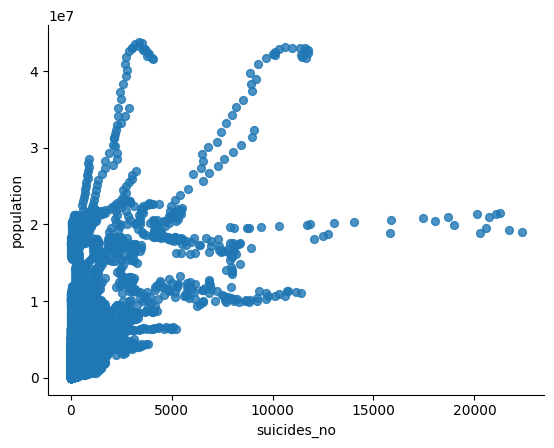

In [ ]:
# suicides_no vs population

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='suicides_no', y='population', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

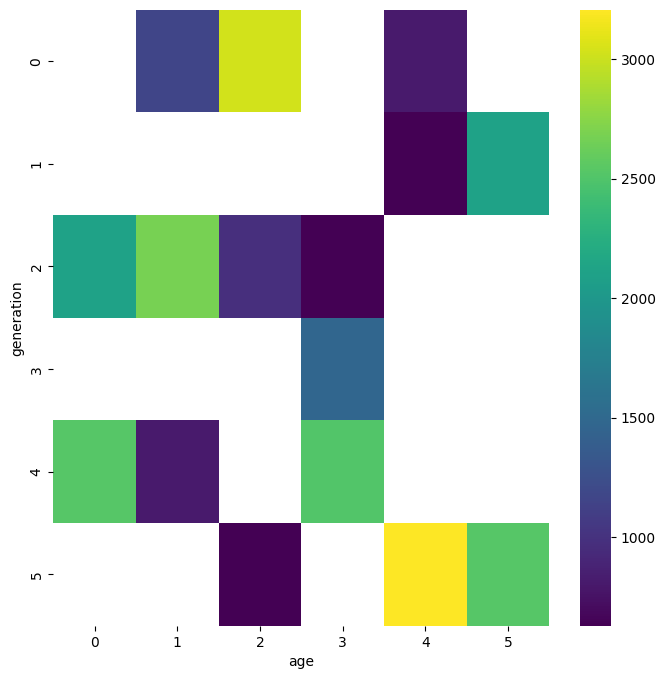

In [ ]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['generation'].value_counts()
    for x_label, grp in df.groupby('age')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('age')
_ = plt.ylabel('generation')

<ipython-input-112-cdfde698493f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df["age"], y=df["suicides_no"], estimator="sum", ci=None)


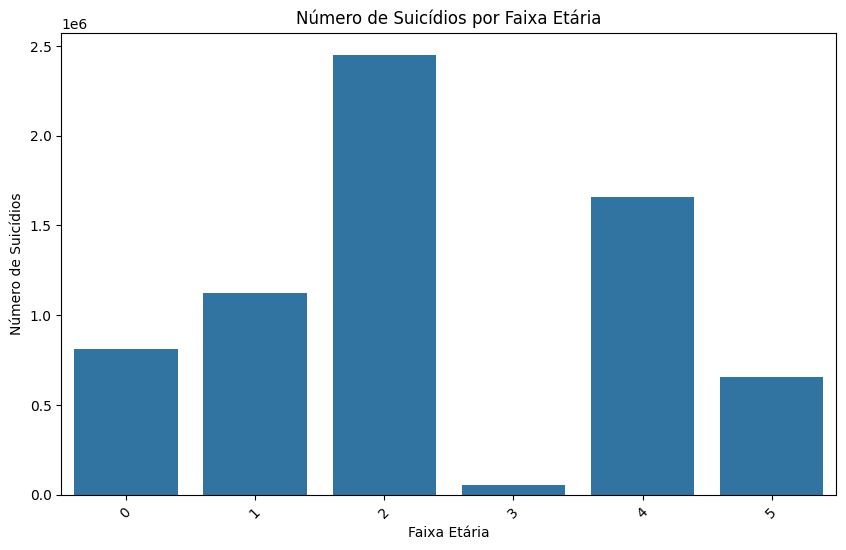

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["age"], y=df["suicides_no"], estimator="sum", ci=None)
plt.title("Número de Suicídios por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Suicídios")
plt.xticks(rotation=45)
plt.show()


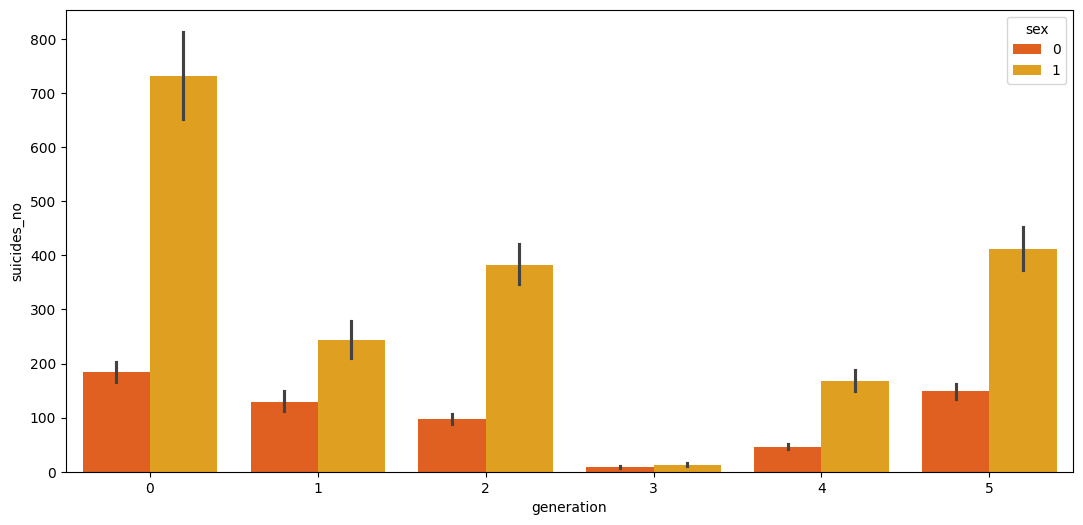

In [ ]:
## Número de suicídios por geração e sexo
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicides_no',
                  hue='sex',data=df, palette='autumn')

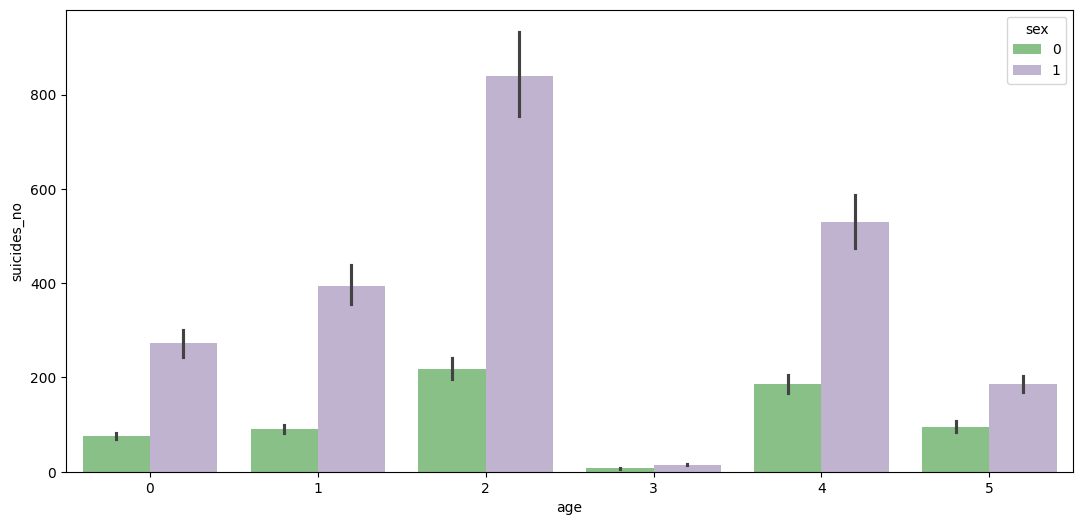

In [ ]:
## Número de suicídios por idade e sexo
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['age'], y = 'suicides_no',
                  hue='sex',data=df, palette='Accent')

<ipython-input-115-af13482f182f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = df['year'], y = 'suicides_no',


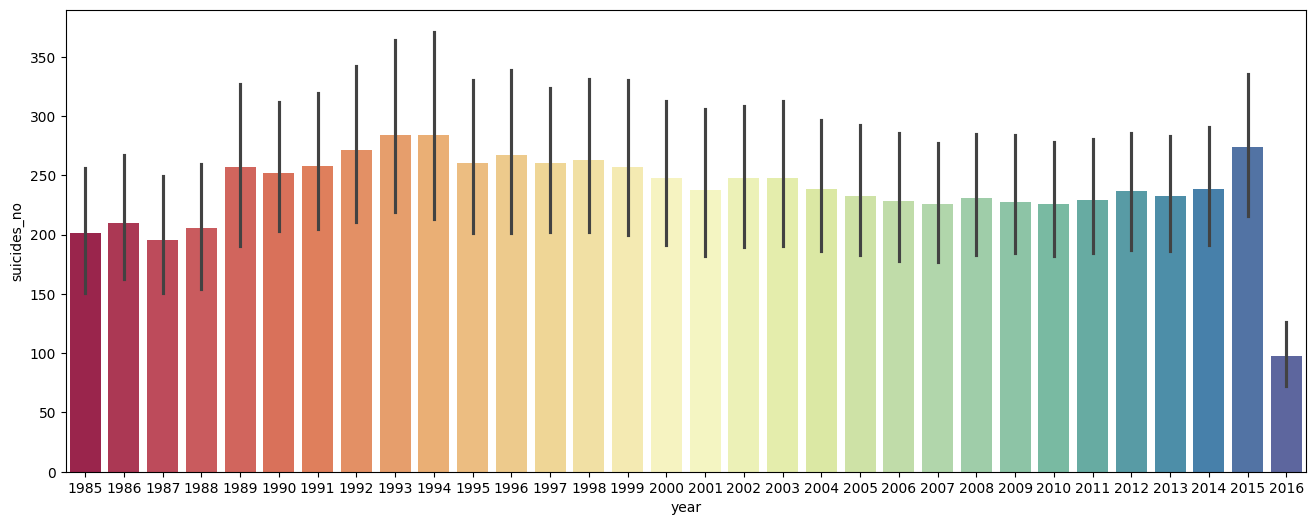

In [ ]:
## Número de suicídios por ano
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = df['year'], y = 'suicides_no',
                data=df, palette='Spectral')

## **Visualizações para o Brasil**


In [ ]:
df_brazil = df_original[df_original["country"].str.strip().str.lower() == "brazil"]



In [ ]:
print(df_brazil.head())
print(df_brazil.shape)


     country  year   sex          age  suicides_no  population  \
4172  Brazil  1985  male    75+ years          129      840300   
4173  Brazil  1985  male  55-74 years          535     5364900   
4174  Brazil  1985  male  35-54 years         1011    11986300   
4175  Brazil  1985  male  25-34 years          791    10762900   
4176  Brazil  1985  male  15-24 years          661    13834000   

      suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
4172              15.35   Brazil1985         0.576    222,942,790,435   
4173               9.97   Brazil1985         0.576    222,942,790,435   
4174               8.43   Brazil1985         0.576    222,942,790,435   
4175               7.35   Brazil1985         0.576    222,942,790,435   
4176               4.78   Brazil1985         0.576    222,942,790,435   

      gdp_per_capita ($)       generation  
4172                1898  G.I. Generation  
4173                1898  G.I. Generation  
4174                1898        

<ipython-input-157-69bb84f97397>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df_brazil["year"], y=df_brazil["suicides_no"], estimator="sum", ci=None)


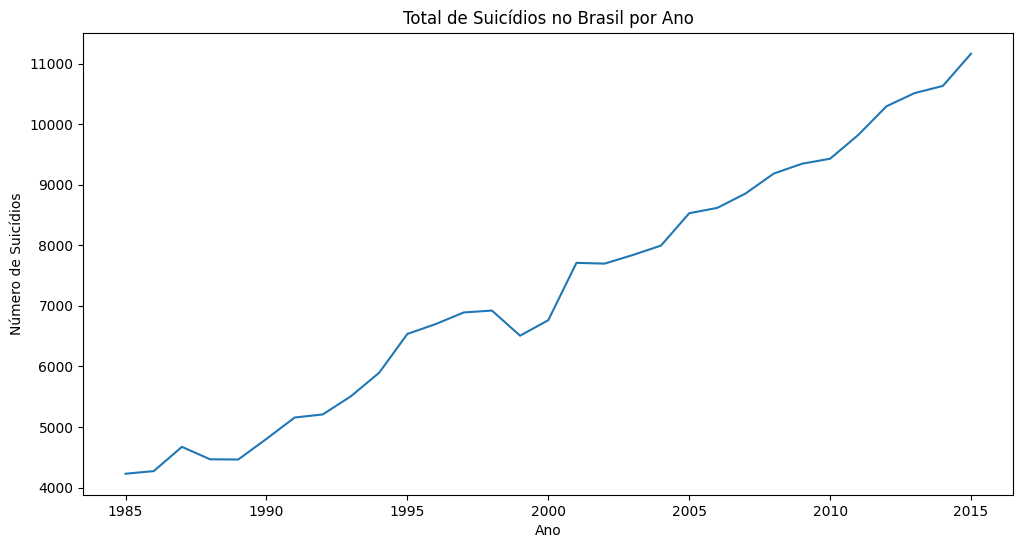

In [ ]:
# Visualizar a taxa de suicídios por ano no Brasil
plt.figure(figsize=(12,6))
sns.lineplot(x=df_brazil["year"], y=df_brazil["suicides_no"], estimator="sum", ci=None)
plt.title("Total de Suicídios no Brasil por Ano")
plt.xlabel("Ano")
plt.ylabel("Número de Suicídios")
plt.show()


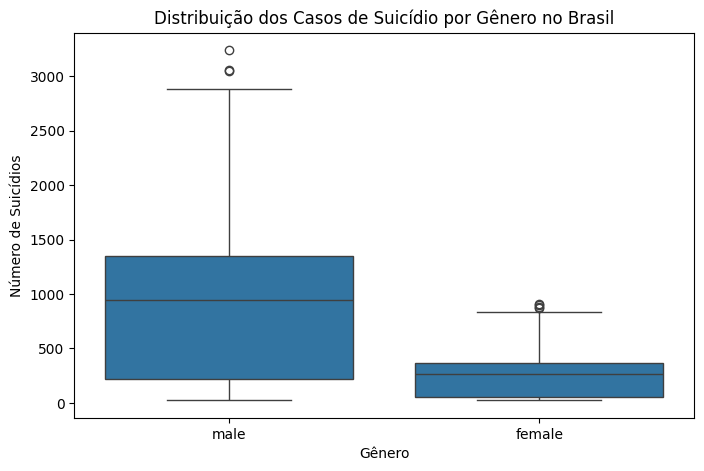

In [ ]:
# Visualização dos suicídios por gênero no Brasil
plt.figure(figsize=(8,5))
sns.boxplot(x=df_brazil["sex"], y=df_brazil["suicides_no"])
plt.title("Distribuição dos Casos de Suicídio por Gênero no Brasil")
plt.xlabel("Gênero")
plt.ylabel("Número de Suicídios")
plt.show()


<ipython-input-163-a451e2ac9e4a>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df_brazil["age"], y=df_brazil["suicides_no"], estimator="sum", ci=None)


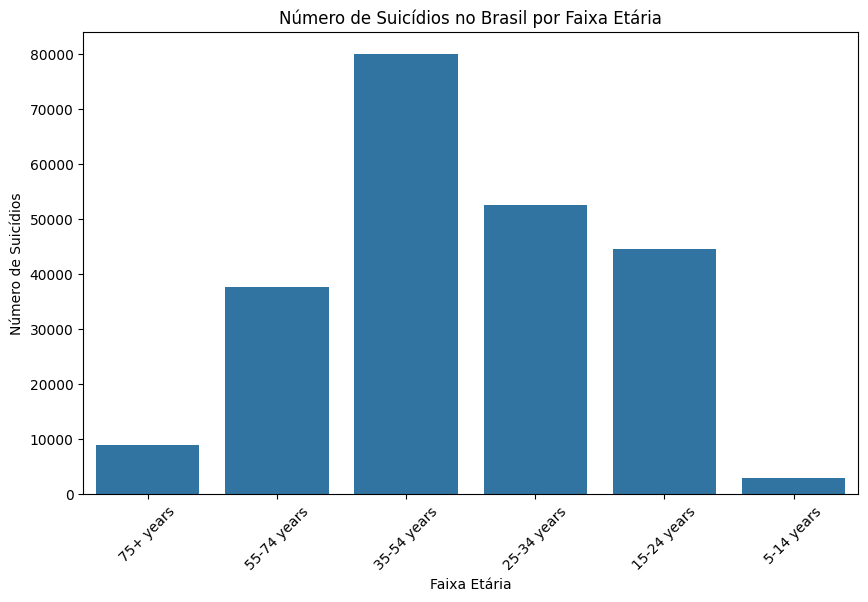

In [ ]:
# Número de suicídios por faixa etária no Brasil
plt.figure(figsize=(10,6))
sns.barplot(x=df_brazil["age"], y=df_brazil["suicides_no"], estimator="sum", ci=None)
plt.title("Número de Suicídios no Brasil por Faixa Etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Número de Suicídios")
plt.xticks(rotation=45)
plt.show()


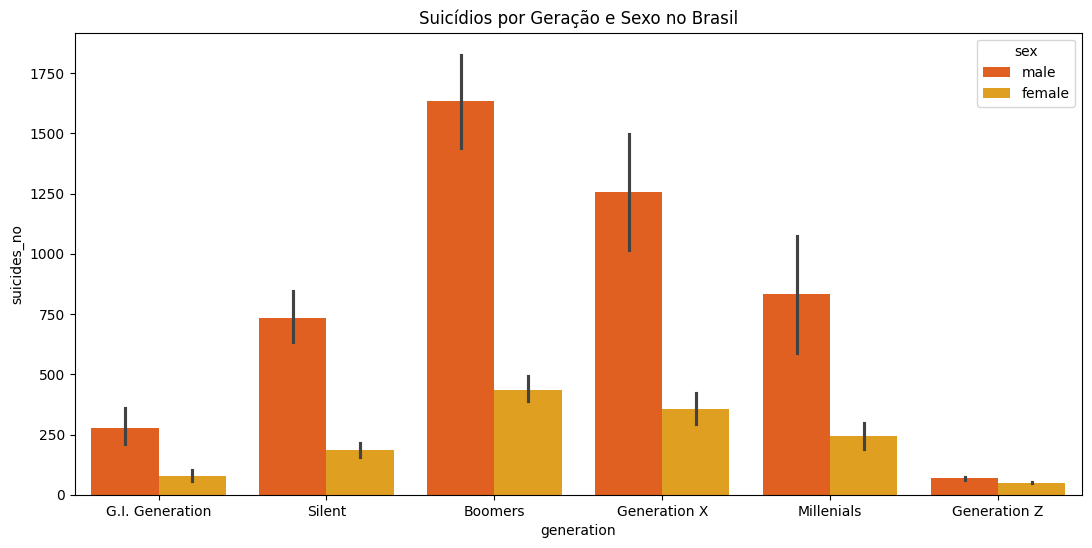

In [ ]:
# Suicídios por geração e sexo no Brasil
f, ax = plt.subplots(1, 1, figsize=(13,6))
sns.barplot(x=df_brazil['generation'], y='suicides_no', hue='sex', data=df_brazil, palette='autumn')
plt.title("Suicídios por Geração e Sexo no Brasil")
plt.show()


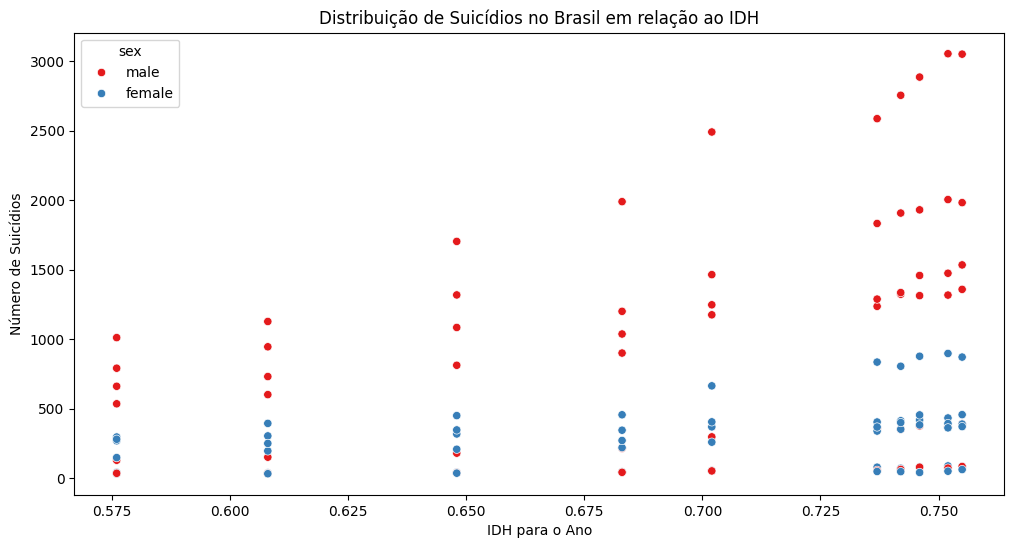

In [ ]:
# Plotando a distribuição de suicídios no Brasil com relação ao IDH
plt.figure(figsize=(12,6))
sns.scatterplot(x=df_brazil["HDI for year"], y=df_brazil["suicides_no"], hue=df_brazil["sex"], palette="Set1")
plt.title("Distribuição de Suicídios no Brasil em relação ao IDH")
plt.xlabel("IDH para o Ano")
plt.ylabel("Número de Suicídios")
plt.show()

Pre-Processing for modelling
# **Pré-processamento para modelagem**


In [ ]:
# Para evitar erros de valor
from sklearn import *


In [ ]:
# Criar X & y

X_df = df.drop("suicides_no", axis=1)
y_df = df["suicides_no"]

X_df.shape, y_df.shape

((27820, 11), (27820,))

In [ ]:
# Embaralhar antes da divisão dos dados em conjuntos de dados de treinamento e teste
np.random.seed(42)

df = df.sample(frac=1)
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
17437,61,2015,1,3,1,987750,0.10,1454,-99999.000,2073,47206,3
23991,87,2001,0,5,31,222745,13.92,2001,-99999.000,505,912,5
8337,29,2013,0,2,19,748153,2.54,695,0.664,885,3885,2
21661,78,1987,0,5,0,1500,0.00,1807,-99999.000,607,1908,1
6235,21,2003,0,5,0,54020,0.00,519,-99999.000,578,4583,5
20326,73,1993,1,5,91,221700,41.05,1696,-99999.000,1403,9479,1
1109,3,2002,1,0,5,293350,1.70,92,-99999.000,754,788,4
24552,89,2002,1,0,78,533111,14.63,2048,-99999.000,1069,31175,4
26109,95,1990,1,0,613,3544600,17.29,2178,0.705,2154,1698,2
13494,46,1995,1,3,43,7125500,0.60,1125,0.838,1687,46043,4


In [ ]:
# Dividindo os dados em conjuntos de dados de treinamento e teste
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22256, 11) (5564, 11) (22256,) (5564,)


##**Modelagem (model_1)**


In [ ]:
# Usando regressão linear para modelar model_1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

np.random.seed(42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Training accuracy
model_1.score(X_train, y_train)

0.4673084901285557

In [ ]:
# Prevendo com model_1
y_pred = model_1.predict(X_test)

In [ ]:
# Métricas (Pontuação R2 (r2), Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 : ", 1 - r2_score(y_test, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  375426.8552517148
r2 :  0.4964215110254583
RMSE :  612.7208624257173


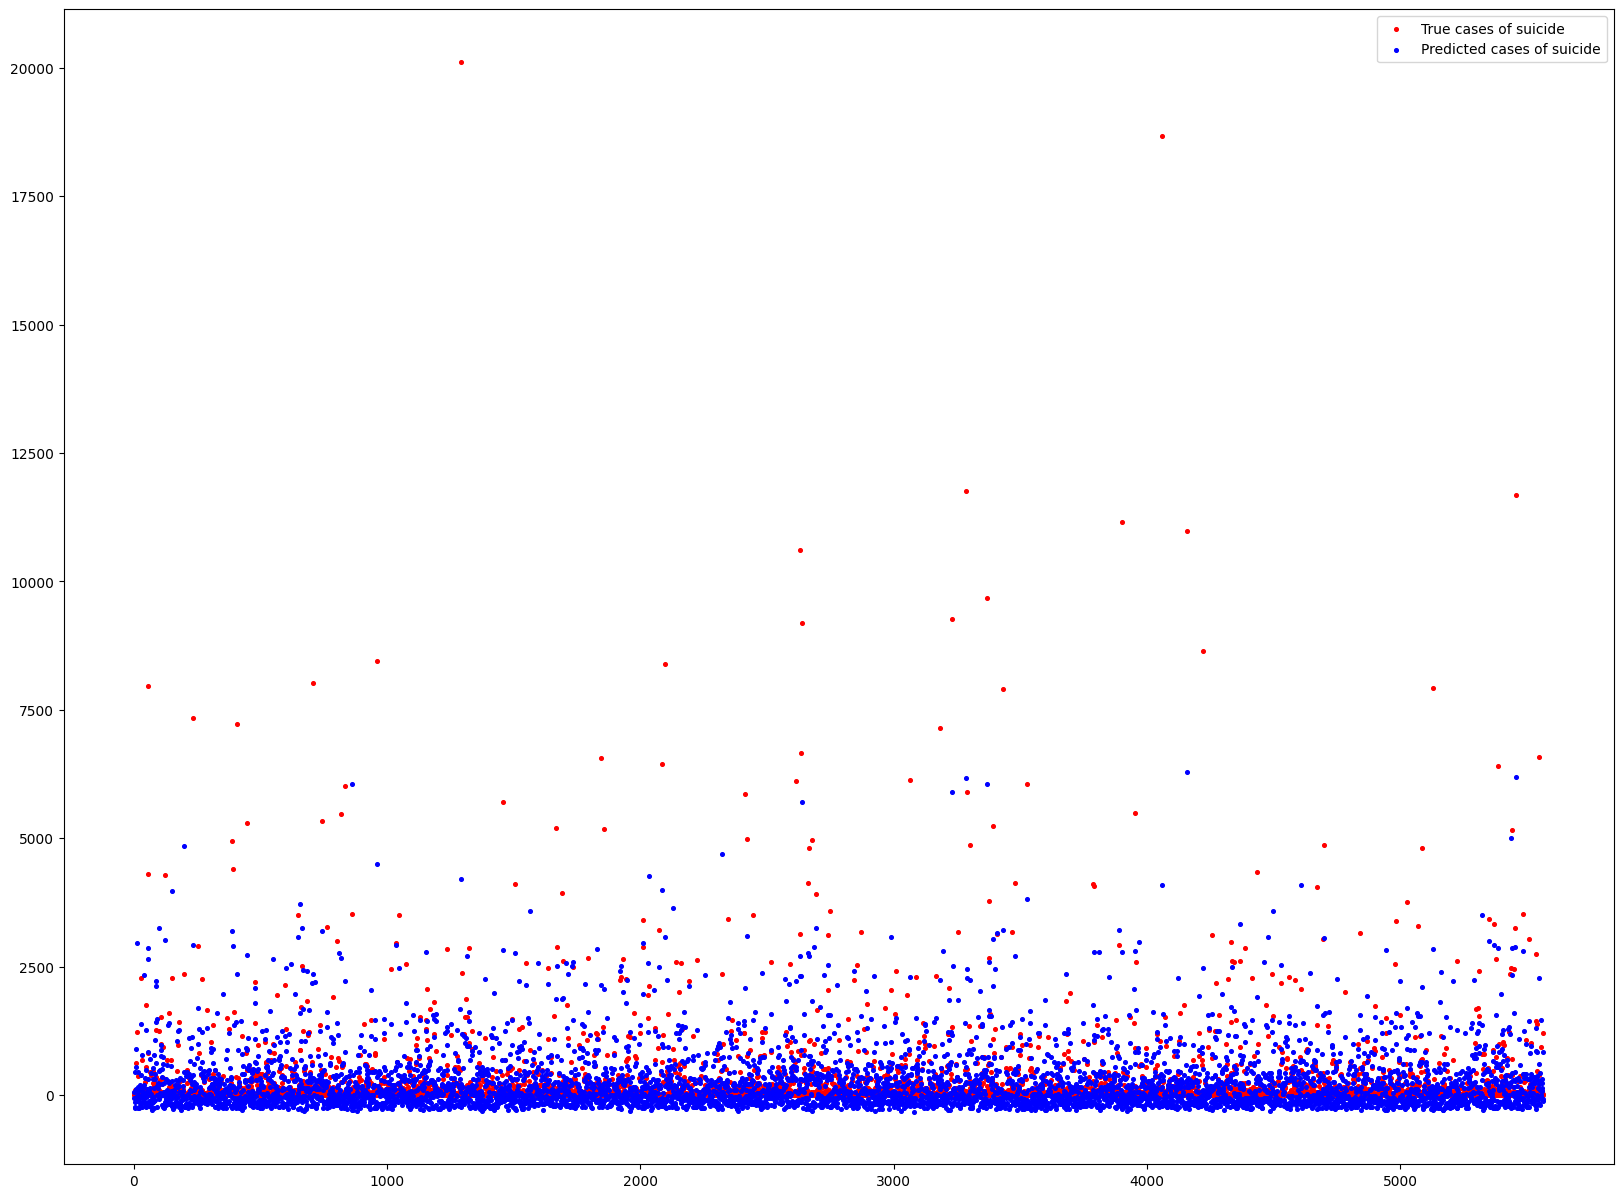

In [ ]:
# Plotando a validação para model_1 (modelo de regressão linear)np.random.seed(42)

fig, ax = plt.subplots(figsize=(20, 15))
a = np.arange(1, len(y_test) + 1, 1)
plt.scatter(a, y_test, label = "True cases of suicide", s=7, color="red")
plt.legend()
plt.scatter(a, y_pred, label = "Predicted cases of suicide", s=7, color="blue")
plt.legend()
plt.show();

##Modelagem (model_2)

In [ ]:
# model_2 usando Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)
model_2.score(X_train, y_train)

0.9992851526933568

In [ ]:
# Previsão em dados de teste
y_pred = model_2.predict(X_test)

In [ ]:
# Métricas para avaliaçãofrom math import sqrt

print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 Score: ", 1-r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  5951.711887544933
r2 Score:  0.007869862709800723
RMSE:  77.14733882348071


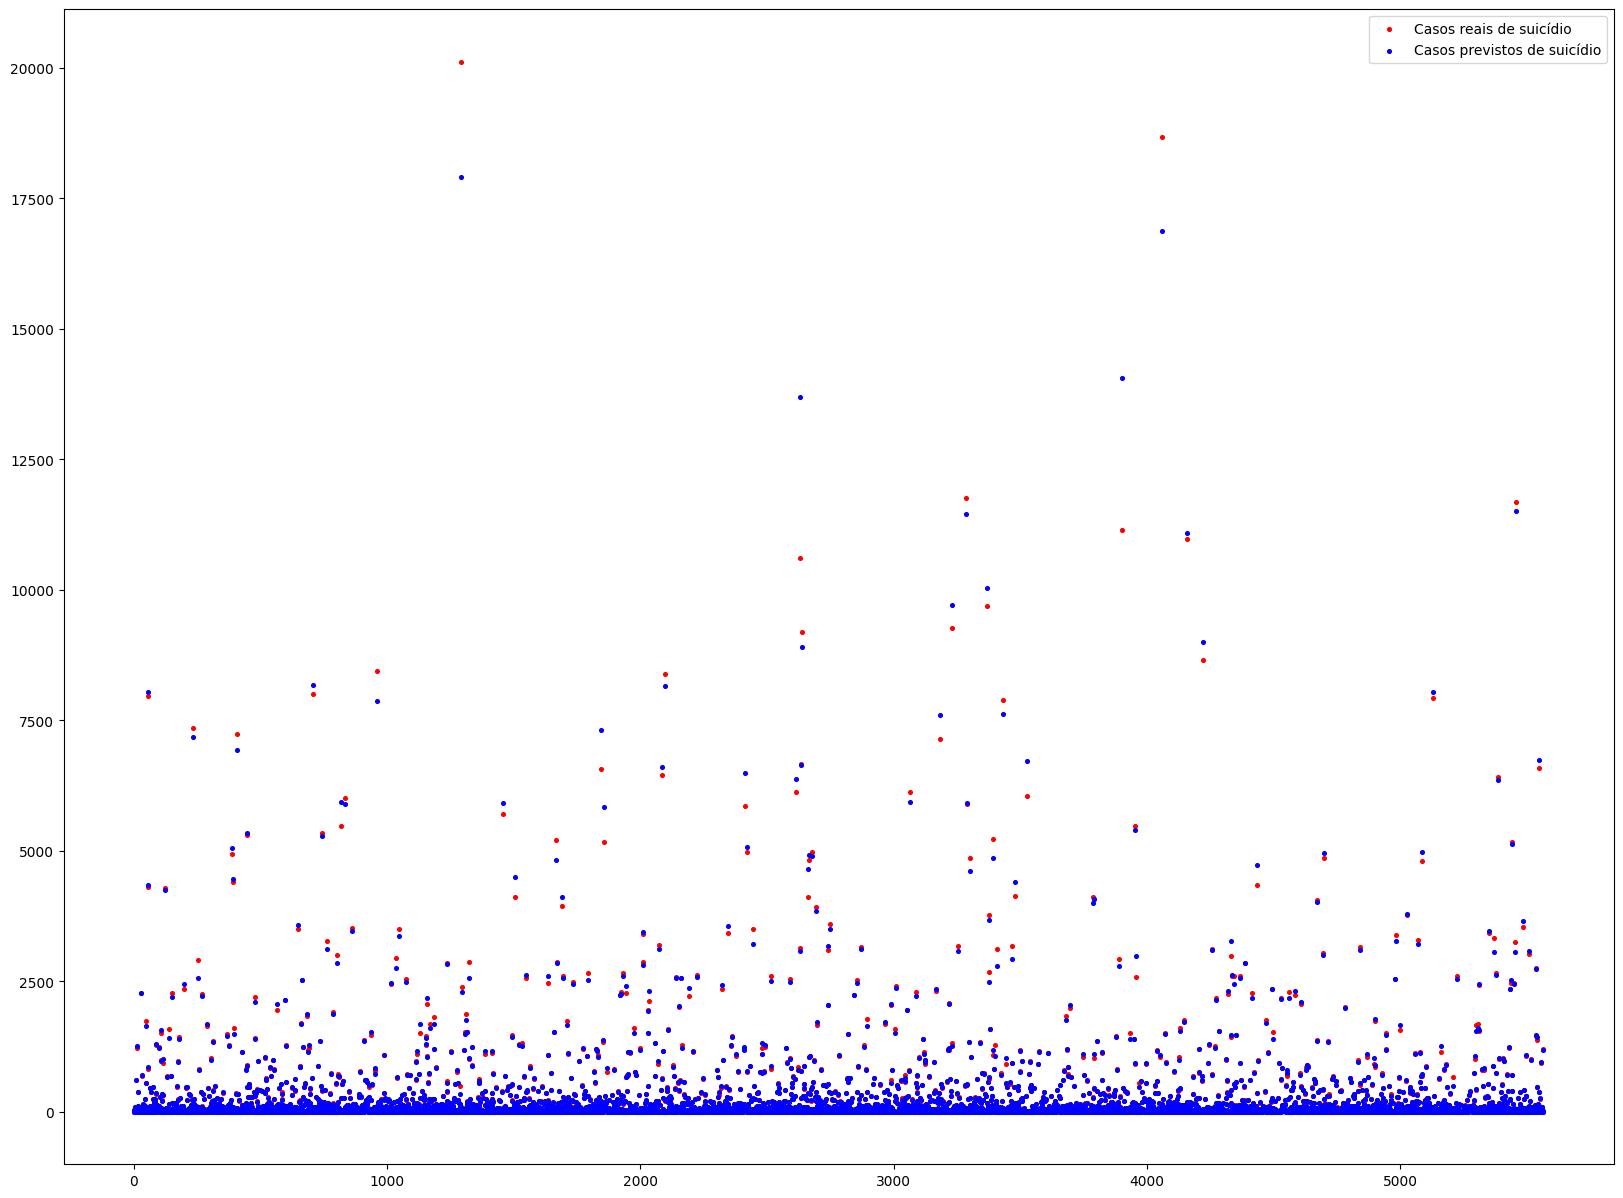

In [ ]:
# Traçando as previsões
np.random.seed(42)

fig, ax = plt.subplots(figsize=(20, 15))
plt.scatter(a, y_test, label = "Casos reais de suicídio", s=7, color="red")
plt.legend()
plt.scatter(a, y_pred, label ="Casos previstos de suicídio", s=7, color="blue")
plt.legend()
plt.show();

Predição sem a coluna "HDI para o ano"
Remover a coluna "HDI para o ano" pode ser benéfico, pois ela contém cerca de 70% de dados nulos.

In [ ]:
# Modelagem model_3 sem coluna "HDI para ano"
X_train3 = X_train.drop("HDI for year", axis=1)
X_test3 = X_test.drop("HDI for year", axis=1)

# Usando Random Forest Regressor
model_3 = RandomForestRegressor()
# Modelagem model_3 sem coluna "HDI para ano"
X_train3 = X_train.drop("HDI for year", axis=1)
X_test3 = X_test.drop("HDI for year", axis=1)

# Usando Random Forest Regressor
model_3 = RandomForestRegressor()
model_3.fit(X_train3, y_train)
# Pontuação
model_3.score(X_train3, y_train)

0.9992681192096687

## **Modelagem (model_3)**

In [ ]:
# Para evitar possível erro de valor
from sklearn import *

# Prevendo com model_3
y_pred = model_3.predict(X_test3)

In [ ]:
# Métricas para avaliação
from math import sqrt

print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 Score: ", 1-r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  5938.8961521207775
r2 Score:  0.00785291664785781
RMSE:  77.06423393585884
